# Data Analysis and Classification with Python

This notebook is designed to guide you through a process of data analysis and classification using Python and various scientific and machine learning libraries. 

## Project Overview

In this project, we aim to classify whether a player is playing padel or tennis based on various variables such as acceleration on the court, speed, and other relevant metrics. By analyzing these variables, we can build a machine learning model that accurately distinguishes between the two sports.

### Importing Libraries

Below, we describe each of the libraries and modules we have imported and how we will use them throughout the analysis.

In [14]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import median
from sklearn import svm, decomposition
from sklearn.svm import SVC
from numpy.fft import fft, ifft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

### Loading and Processing Data for Tennis and Padel Classification

In this section, we load the data for tennis and padel games and apply Fast Fourier Transform (FFT) to the acceleration data. This helps us to analyze the frequency components of the acceleration signals, which can be useful features for classification.

In [15]:
df_t = pd.read_csv("path\\to\\one\\file\\tl0.csv")
X_tenis = fft(df_t['X'])
Y_tenis = fft(df_t['Y'])
Z_tenis = fft(df_t['Z'])

df_p = pd.read_csv("path\\to\\one\\file\\p0.csv")
X_padel = fft(df_p['X'])
Y_padel = fft(df_p['Y'])
Z_padel = fft(df_p['Z'])

### Frequency Analysis of Tennis and Padel Players' Movements

In this section, we perform a first analysis of the frequency characteristics of the movements for both tennis and padel players.

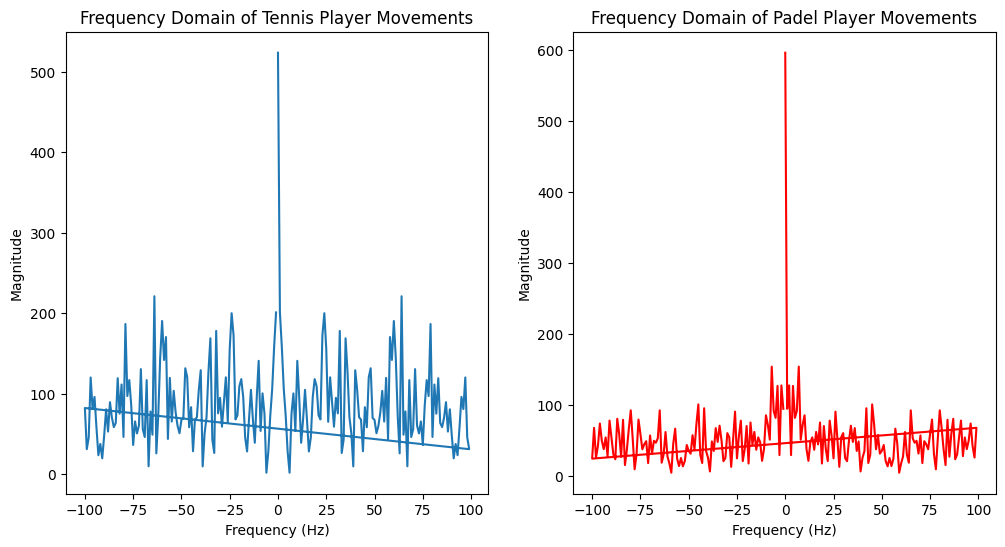

In [16]:
# Sampling rate
sr = 200
N = len(X_tenis)

# Extracted features
yft = X_tenis
xft = fftfreq(N, d=1./sr)

# Plot frequency domain
yfp = X_padel
xfp = fftfreq(N, d=1./sr)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(xft, np.abs(yft))
plt.title('Frequency Domain of Tennis Player Movements')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(xfp, np.abs(yfp), 'r')
plt.title('Frequency Domain of Padel Player Movements')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

### Frequency and Time Domain Analysis of Tennis Player Movements

In this section, we analyze the frequency and time domain representations of the acceleration data for a tennis player. This analysis helps us understand both the frequency components and the original time-domain signal after applying the Inverse Fast Fourier Transform (IFFT).

c:\Users\luisg\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\luisg\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


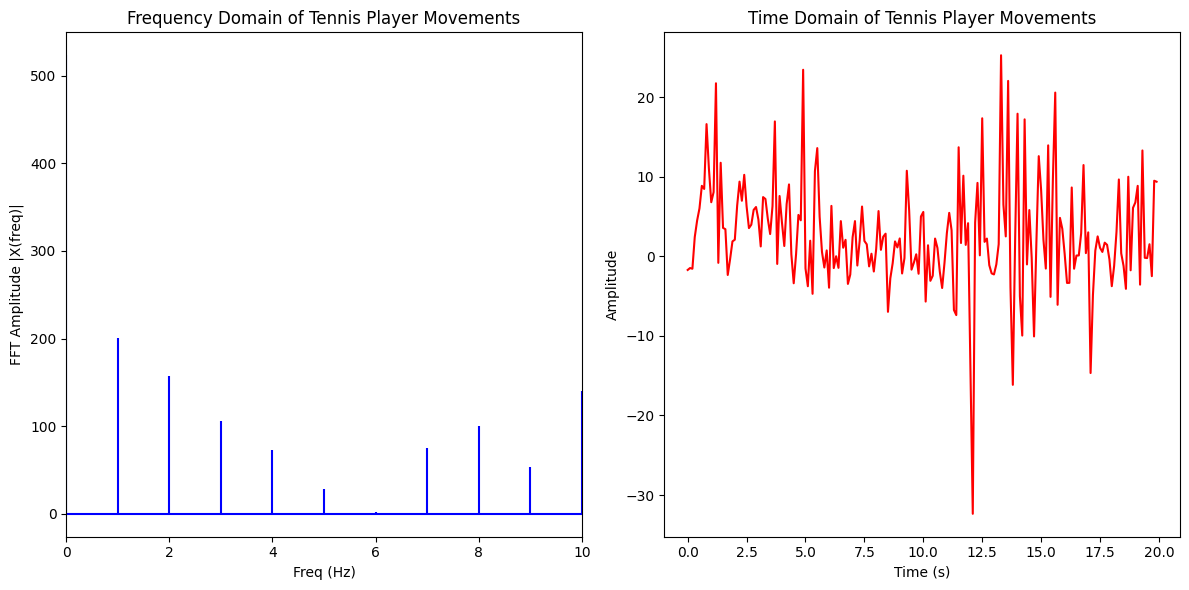

In [17]:
n = np.arange(N)
T = N/sr
ts = 20.0/sr
t = np.arange(0,20,ts)
freq = n/T

# Different graphics to analyze the data set
plt.figure(figsize=(12, 6))

# Frequency Domain Plot
plt.subplot(121)
plt.stem(freq, np.abs(X_tenis), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.title('Frequency Domain of Tennis Player Movements')

# Time Domain Plot
plt.subplot(122)
plt.plot(t, ifft(X_tenis), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain of Tennis Player Movements')

plt.tight_layout()
plt.show()

### Frequency and Time Domain Analysis of Padel Player Movements

In this section, we analyze the frequency and time domain representations of the acceleration data for a padel player. This analysis helps us understand both the frequency components and the original time-domain signal after applying the Inverse Fast Fourier Transform (IFFT).

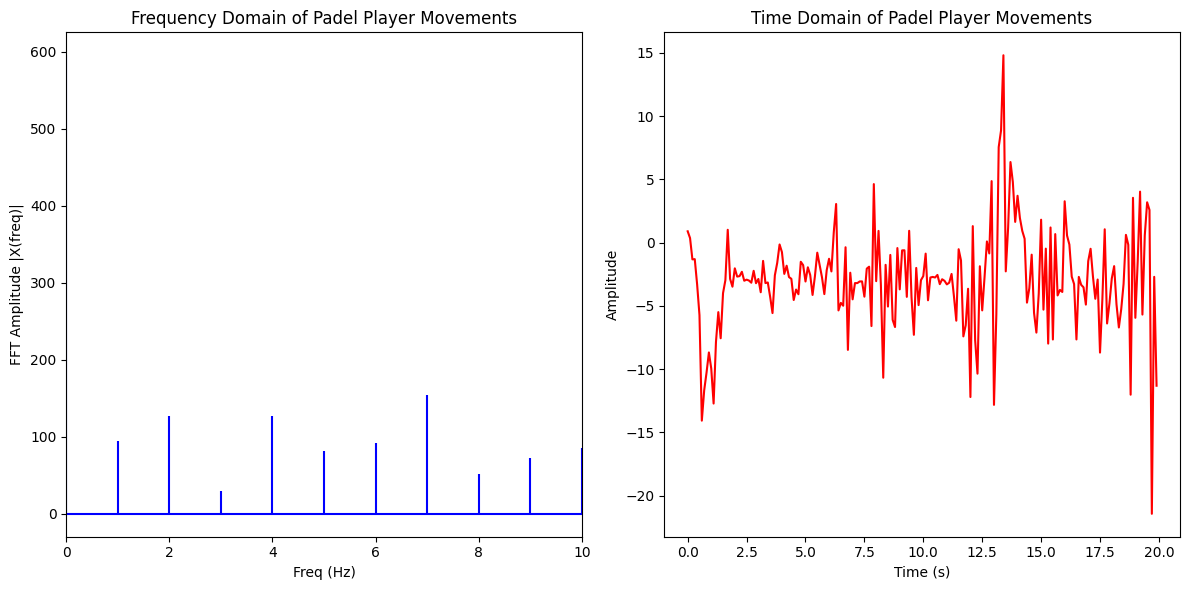

In [18]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X_padel), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Frequency Domain of Padel Player Movements')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X_padel), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain of Padel Player Movements')
plt.tight_layout()
plt.show()

### Counting CSV Files in a Folder Function

In this section, we define a function to count the number of CSV files in a given folder. This is useful for verifying the number of data files available for analysis.

In [19]:
def count_csv_files(folder_path):
    # List all files in the given folder
    files = os.listdir(folder_path)
    
    # Filter out files that end with '.csv'
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Return the count of CSV files
    return len(csv_files)

### Converting Samples to Dataset with Appropriate Features

In this section, we convert raw acceleration data samples for tennis and padel into a structured dataset with relevant features. This dataset will be used for classification tasks to distinguish between tennis and padel players.

In [20]:
#Convert samples to data set, with appropiate features
folder_path = "path\\to\\folder"

tl_count = count_csv_files(folder_path + "\\tl")
tenis_samples = range(0, tl_count)

pl_count = count_csv_files(folder_path + "\\pl")
padel_samples = range(tl_count, tl_count + pl_count)

elements = np.empty([tl_count + pl_count,8])
results = np.empty((tl_count + pl_count,1), str)

for i in tenis_samples:
  df_t = pd.read_csv(f'{folder_path}\\tl\\tl{str(i)}.csv')
  df_t = df_t.drop('Timestamp', axis=1)
  Acc = df_t.to_numpy()
  Acc2 = np.linalg.norm(Acc,axis=1)

  freq_Acc = fft(Acc2)

  elements[i,0] = sum(np.power(abs(freq_Acc),2))
  elements[i,1] = abs(freq_Acc).max()
  elements[i,2] = median(abs(freq_Acc))
  elements[i,3] = np.std(abs(freq_Acc))


  elements[i,4] = sum(np.power(Acc2,2))
  elements[i,5] = Acc2.max()
  elements[i,6] = median(Acc2)
  elements[i,7] = np.std(Acc2)

  results[i,0] = "Tenis"

for i in padel_samples:
  df_p = pd.read_csv(f'{folder_path}\\pl\\p'+str(i-tl_count)+'.csv')
  df_p = df_p.drop('Timestamp', axis=1)
  Acc = df_p.to_numpy()
  Acc2 = np.linalg.norm(Acc,axis=1)

  freq_Acc = fft(Acc2)

  elements[i,0] = sum(np.power(abs(freq_Acc),2))
  elements[i,1] = abs(freq_Acc).max()
  elements[i,2] = median(abs(freq_Acc))
  elements[i,3] = np.std(abs(freq_Acc))


  elements[i,4] = sum(np.power(Acc2,2))
  elements[i,5] = Acc2.max()
  elements[i,6] = median(Acc2)
  elements[i,7] = np.std(Acc2)

  results[i,0] = "Padel"

### Creating a DataFrame with Extracted Features

In this section, we add a column indicating the sport (tennis or padel) for each sample. This structured DataFrame will be used for further analysis and model training.

In [21]:
df = pd.DataFrame(elements,
             columns = ['Sum of squared FFT amplitudes of the L2 norm','Maximum FFT amplitude of the L2 norm','Median FFT amplitude of the L2 norm',
             'Standard deviation of FFT amplitudes of the L2 norm','Sum of squared L2 norm','Maximum value of the L2 norm',
             'Median value of the L2 norm','Standard deviation of the L2 norm'])
df["Sport"] = results

df.head()

,Sum of squared FFT amplitudes of the L2 norm,Maximum FFT amplitude of the L2 norm,Median FFT amplitude of the L2 norm,Standard deviation of FFT amplitudes of the L2 norm,Sum of squared L2 norm,Maximum value of the L2 norm,Median value of the L2 norm,Standard deviation of the L2 norm,Sport
0,1.183339e+07,2816.783291,116.450725,201.713936,59166.974682,49.948797,11.377819,9.873103,T
1,8.900903e+06,2504.566234,103.863333,177.261653,44504.514773,50.378287,10.077711,8.105632,T
2,8.823472e+06,2437.216885,102.249632,171.720281,44117.358560,62.871944,10.246047,8.490356,T
3,8.829125e+06,2461.328805,103.000448,174.506369,44145.626147,52.067383,9.982632,8.323139,T
4,9.373061e+06,2593.105955,92.363996,184.909548,46865.306996,45.397568,10.231405,8.137664,T


Create a DataFrame with only the numerical data. Remove the results column.

In [22]:
df_num = df.drop(["Sport"],axis = 1)

df_num.head()

,Sum of squared FFT amplitudes of the L2 norm,Maximum FFT amplitude of the L2 norm,Median FFT amplitude of the L2 norm,Standard deviation of FFT amplitudes of the L2 norm,Sum of squared L2 norm,Maximum value of the L2 norm,Median value of the L2 norm,Standard deviation of the L2 norm
0,1.183339e+07,2816.783291,116.450725,201.713936,59166.974682,49.948797,11.377819,9.873103
1,8.900903e+06,2504.566234,103.863333,177.261653,44504.514773,50.378287,10.077711,8.105632
2,8.823472e+06,2437.216885,102.249632,171.720281,44117.358560,62.871944,10.246047,8.490356
3,8.829125e+06,2461.328805,103.000448,174.506369,44145.626147,52.067383,9.982632,8.323139
4,9.373061e+06,2593.105955,92.363996,184.909548,46865.306996,45.397568,10.231405,8.137664


### Principal Component Analysis (PCA) with Standardized Data

In this section, we perform PCA on the standardized dataset to reduce dimensionality and understand the variance explained by each principal component.

In [23]:
#PCA with standarized data
X = df_num.values
X = (X-X.mean(axis=0))/X.std(axis=0) #standardizing data

y = df["Sport"]

df_sca = StandardScaler().fit_transform(df_num)
components = df_num.shape[1]

pca = decomposition.PCA(n_components=components).fit(df_sca)
100*pca.explained_variance_ratio_

100*pca.explained_variance_ratio_.cumsum()

array([ 92.59389134,  97.3233324 ,  99.31713711,  99.7770007 ,
        99.93428624,  99.99294597, 100.        , 100.        ])

We extract the principal components and transform the data accordingly.

In [24]:
vec = pca.components_

Xproj = pca.transform(df_sca)
dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1','PCA2'])
dfpca.head()

,PCA1,PCA2
0,0.823326,1.145946
1,-1.004097,-0.162541
2,-0.812676,-0.480938
3,-1.077769,-0.340078
4,-0.902498,0.281049


### Splitting Data into Training and Testing Sets

In this section, we split the transformed data into training and testing sets using the projection obtained from PCA. We use an 80-20 split for the training and testing datasets.

In [25]:
#Splitting in train and test with the projection obtained
Xtrain, Xtest, ytrain, ytest = train_test_split(Xproj[:,0:2], y, train_size=0.8,random_state = 15)

print('Training observations = {}'.format(Xtrain.shape[0]))
print('Test observations = {}'.format(Xtest.shape[0]))

Training observations = 66
Test observations = 17


### Hyperparameter Tuning Using Grid Search

In this section, we define a parameter grid and perform hyperparameter tuning using GridSearchCV to find the best parameters for an SVM model. The evaluation metric used is the macro-averaged F1 score.


In [26]:
# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000, 100000],
    'gamma': ['scale' , 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','sigmoid','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = 'f1_macro',scoring = 'f1_macro' ,verbose = 3)

# fitting the model for grid search
grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.845 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.921 total time=   0.0s
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.854 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 4/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.845 total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.854 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linea

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': ['scale', 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             refit='f1_macro', scoring='f1_macro', verbose=3)

The best parameters are:

In [27]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=0.1, gamma=10, kernel='sigmoid')


### Training the SVM Model with Best Parameters and Evaluating Performance

In this section, we train an SVM model using the best hyperparameters found from the grid search and then evaluate its performance on the test set.

In [28]:
clf = svm.SVC(gamma = grid.best_estimator_.gamma, C = grid.best_estimator_.C, kernel = grid.best_estimator_.kernel)
clf.fit(Xtrain,ytrain)

yfit = clf.predict(Xtest)

print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           P       0.80      0.89      0.84         9
           T       0.86      0.75      0.80         8

    accuracy                           0.82        17
   macro avg       0.83      0.82      0.82        17
weighted avg       0.83      0.82      0.82        17



In this section, we perform cross-validation to evaluate the accuracy and F1-score of the trained SVM model on the test set. The results include the mean and standard deviation of the scores.

In [29]:
#Print the scores and results
acc_scores = cross_val_score(clf,Xtest,ytest, cv=5,scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(),acc_scores.std()/np.sqrt(5)))

f1_scores = cross_val_score(clf,Xtest,ytest, cv=5,scoring = 'f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (f1_scores.mean(),f1_scores.std()/np.sqrt(5)))

Accuracy: 0.88 (+/- 0.06)
F1-score: 0.88 (+/- 0.07)


The confusion matrix for the test set predictions is computed and visualize it using a heatmap.

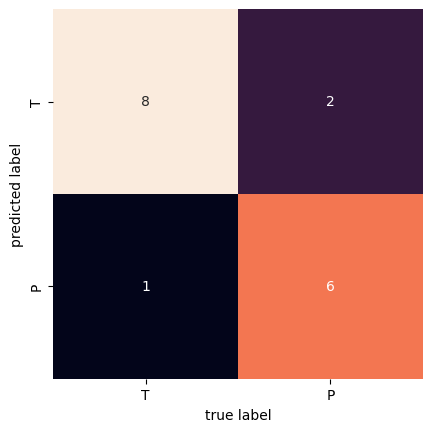

In [30]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True,annot=True, fmt='d', cbar=False,
            xticklabels=["T","P"],
            yticklabels=["T","P"])
plt.xlabel('true label');
plt.ylabel('predicted label');

Different kernel functions are evaluated for the SVM model by visualizing decision boundaries and support vectors for each kernel type. To contrast with previous results.

C:\Users\luisg\AppData\Local\Temp\ipykernel_2284\3460210383.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ycolors, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
C:\Users\luisg\AppData\Local\Temp\ipykernel_2284\3460210383.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ycolors, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
C:\Users\luisg\AppData\Local\Temp\ipykernel_2284\3460210383.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ycolors, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
C:\Users\luisg\AppData\Local\Temp\ipykernel_2284\3460210383.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ycolors, zorder=10, cmap=plt

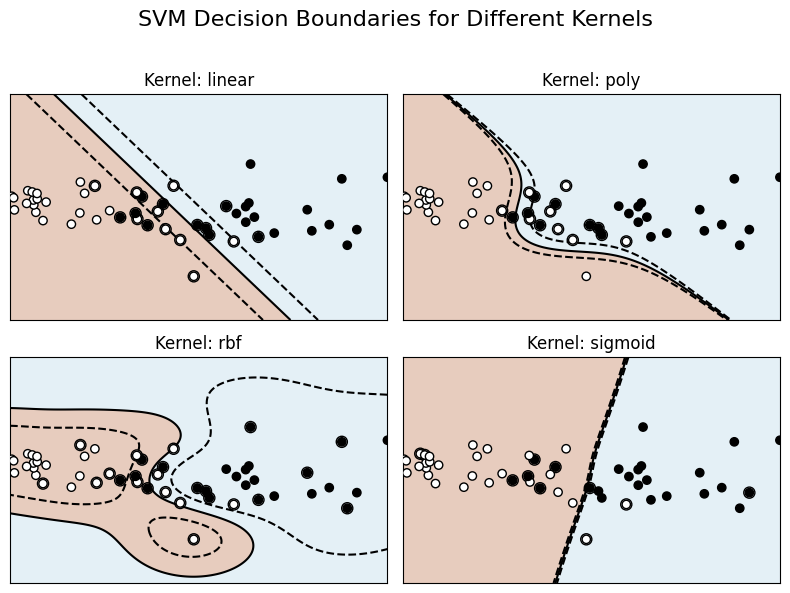

In [31]:
# Define the figure number and create a grid layout
fignum = 1

# Convert labels to colors for plotting
ycolors = ytrain
ycolors[ycolors == 'T'] = 'k'  # black
ycolors[ycolors == 'P'] = 'w'  # white

# Define kernel types
kernels = ["linear", "poly", "rbf", "sigmoid"]

# Create a plot for each kernel
plt.figure(figsize=(8, 6))

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma=1, C=1)
    clf.fit(Xtrain, ytrain)

    # Create subplot for each kernel
    plt.subplot(2, 2, fignum)
    
    # Plot support vectors
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=64,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    
    # Plot training data
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ycolors, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
    
    # Set axis limits and labels
    plt.axis("tight")
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    # Plot decision boundaries
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.3)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.title('Kernel: ' + kernel)
    
    # Increment figure number
    fignum += 1

# Add a general title for the entire figure
plt.suptitle('SVM Decision Boundaries for Different Kernels', fontsize=16)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the bottom to fit the suptitle
plt.show()

### Applying Weights to Decision Functions

In this section, we define a function to plot the decision function of an SVM model while incorporating sample weights. This function visualizes the decision boundaries and the impact of weights on the training data points.

In [32]:
#Apply weights
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        Xtrain[:, 0],
        Xtrain[:, 1],
        c=ycolors,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)

Apply random weights

In [33]:
sample_weight_last_ten = abs(np.random.randn(len(Xtrain)))
sample_weight_constant = np.ones(len(Xtrain))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

### Comparison of SVM Models with and without Sample Weights

In this section, we compare the decision functions of two SVM models: one without sample weights and one with modified sample weights. This comparison helps illustrate the impact of sample weights on the model's decision boundaries.

Analyzing the effect of sample weights allows you to gain deeper insights into your model's behavior and improve its performance by appropriately handling different samples in the training dataset.

C:\Users\luisg\AppData\Local\Temp\ipykernel_2284\1953883772.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(
C:\Users\luisg\AppData\Local\Temp\ipykernel_2284\1953883772.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(


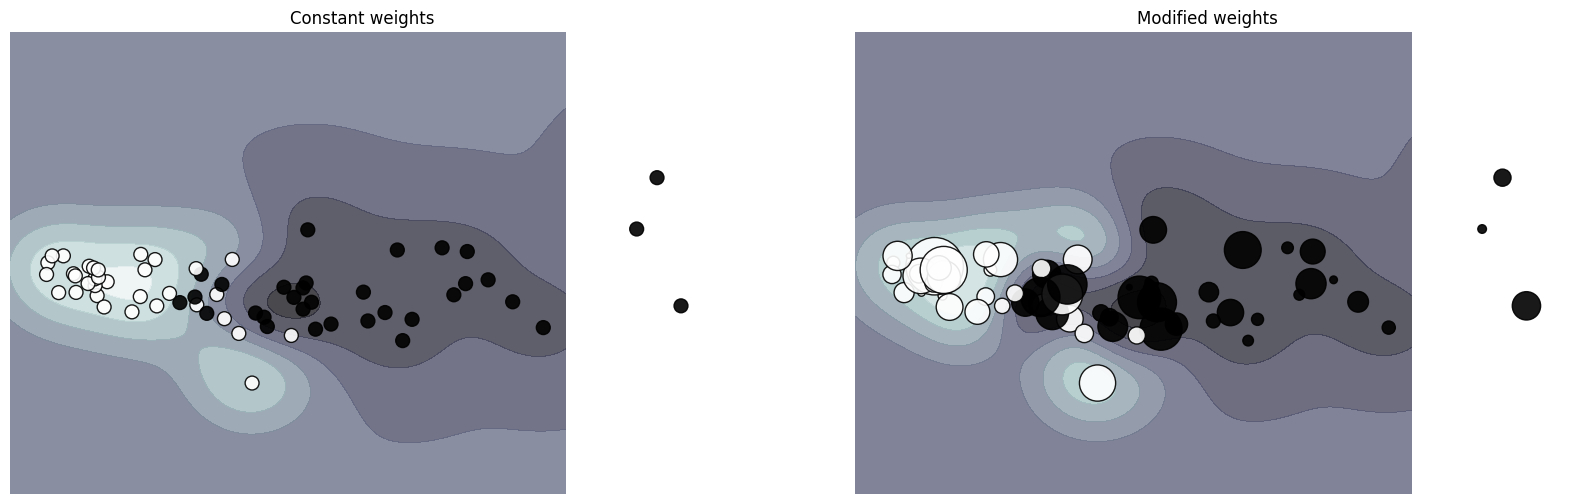

In [34]:
# Fit the models.

# This model does not take into account sampl
# e weights.
clf_no_weights = svm.SVC(gamma=1,C=1,kernel='rbf')
clf_no_weights.fit(Xtrain, ytrain)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1,C=1,kernel='rbf')
clf_weights.fit(Xtrain, ytrain, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()